In [7]:
import pandas as pd
import nltk
import numpy as np
from numpy import random as npr
import time
import string
import sklearn
import random
# from itertools import chain, imap

In [1]:
pip install imbalanced-learn


     -------------------------------------- 226.0/226.0 kB 1.5 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import imblearn
from imblearn.over_sampling import RandomOverSampler


In [5]:
imblearn.__version__

'0.10.1'

In [10]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [2]:
from sklearn import metrics
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import re
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
#from operator import itemgetter

In [7]:
# Read data into pandas dataframe
df1 = pd.read_json('final_50k_221118.json', lines=True)

### Shuffling data and selecting first 30000 rows

In [8]:
df_shuffled = df1.sample(frac=1, random_state=39)

# Reset the index
df_shuffled = df_shuffled.reset_index(drop=True)

# Select first 30000 rows from the shuffled data set
df_30 = df_shuffled[0:30000]

# Regroup the df_30 dat set with unique business id
df_new = df_30.groupby(df_30["awesome_biz_id"],as_index=False).agg({"content":' '.join,"business_name":"first","is_entertainment":"first","is_traffic":"first"})

# Define the label
label = ["is_entertainment","is_traffic"]

# Extract the labels
labeldf = df_new[["is_entertainment","is_traffic"]]

# Extract "business name" and "content" columns
df2 = df_new[["business_name","content"]]

In [9]:
df2

,business_name,content
0,Calzone,They do not make authentic Italian calzones. O...
1,cheebapotshop.com,They are scammers!!! DO NOT BUY PRODUCTS FROM ...
2,Perk Coffee Bar,Just opened the paper bag to find a burnt croi...
3,MB KAZMO OIL CO,Needed a quick car wash!!! In the sign $4.19 i...
4,Wash-N-Deliver,"This service is convenient, easy, and fast. Li..."
...,...,...
18719,Lucky Liquor Market,"Vonsland! I swear, THIS IS ACTUALLY A SMALL TO..."
18720,Pinot's Palette,"This is a fun place to relax, create a paintin..."
18721,Diem Hen,3 stars for food and service. I have a friend ...
18722,Empire Hookah Lounge,It's wasn't bad as all. It's very slow and eve...


### Split into Train and Test

In [10]:
df2_train, df2_test = train_test_split(df2, test_size=0.2, random_state=434)
df2_train = df2_train.reset_index()
df2_test = df2_test.reset_index()

### Tokenizing Data

In [11]:
token = []
name = ["business_name","content"]
dic1 = {}
WORD = re.compile(r'\w+')


token = []
name = ["business_name","content"]
dic_train = {}
dic_test = {}
WORD = re.compile(r'\w+')

In [12]:
def regTokenize(text):
    words = WORD.findall(text)
    return words

In [13]:
# train
for i in [0,1]:
    arrx = []
    for j in range(0,len(df2_train)):
    #for j in range(0,len(df2[name[i]])):
        listx = regTokenize(df2_train[name[i]][j])
        arrx.append(listx)
    dic_train[name[i]] = arrx

# test 
for i in [0,1]:
    arrx = []
    for j in range(0,len(df2_test)):
    #for j in range(0,len(df2[name[i]])):
        listx = regTokenize(df2_test[name[i]][j])
        arrx.append(listx)
    dic_test[name[i]] = arrx   
#print(dic1["business_name"])
# print(dic1["content"][1])
# dic1 contains all the tokens of business name and contents

### Stopwords

In [14]:
stop_words = set(stopwords.words("english"))
for i in range(len(string.punctuation)):    
    stop_words.add(string.punctuation[i])
stop_words.add("'s")
stop_words.add(".....")
print(stop_words)

{'m', 'it', 'now', 'this', "that'll", 'but', 'when', 'same', '$', 'ours', 'his', "aren't", '>', "she's", 'itself', 'if', 'under', 'or', 'above', 'him', 'against', 'once', ':', 're', '<', 'd', 'has', 'll', "won't", 'between', 'in', 'my', 'theirs', ')', 'so', 'mightn', 'our', '&', 'o', 'than', 'no', 'what', 'them', '.', 'down', 'having', 'couldn', '_', 'nor', 'he', 'such', "don't", "needn't", 'doing', "you'll", 'will', 'y', 'can', "mustn't", 'doesn', 'were', 'ourselves', 'because', 'more', 'hasn', 'haven', "hasn't", '!', '}', 'its', 'themselves', 'are', 'other', '=', 'where', 'i', 'during', "doesn't", "shan't", 'had', 'hers', '?', 'any', 'not', 'aren', 'have', '@', 'until', '{', '#', 'off', 'a', 'they', '^', 'few', "you'd", "couldn't", 'is', 'didn', 's', 'just', 'weren', 'into', 'below', 'you', 'herself', '*', 'ain', 'does', 'her', '`', 'each', "wouldn't", 'don', 'won', 'we', 'only', 'here', 'their', 'most', 'who', 'that', 'about', '|', 'am', 'out', 'why', 'yourself', 'myself', 'wasn', '

### Stemming

In [15]:
stemmer = PorterStemmer()

# train
for i in [0,1]:
    arrc = []
    for j in range(0,len(dic_train[name[i]])):
        flist = []
        for z in dic_train[name[i]][j]:
            if z.casefold() not in stop_words:
                flist.append(stemmer.stem(z))
        arrc.append(' '.join(flist))
    dic_train[name[i]] = arrc
    
# test
for i in [0,1]:
    arrc = []
    for j in range(0,len(dic_test[name[i]])):
        flist = []
        for z in dic_test[name[i]][j]:
            if z.casefold() not in stop_words:
                flist.append(stemmer.stem(z))
        arrc.append(' '.join(flist))
    dic_test[name[i]] = arrc

### TF-IDF without NMF/SVD (without combining content and business name) 0.001 threshold


In [16]:
# train tf-idf
tf_idf_model_train_01  = TfidfVectorizer(min_df=0.001,max_features=300)
#print(tf_idf_model.get_feature_names_out())
bustf = dic_train["business_name"]
tf_idf_vector1 = tf_idf_model_train_01.fit_transform(bustf)
tf_idf_array1 = tf_idf_vector1.toarray()
#print(tf_idf_model.get_feature_names_out())
tf_idf_model_train_01  = TfidfVectorizer(min_df=0.001,max_features=3000)
contf = dic_train["content"]
tf_idf_vector2 = tf_idf_model_train_01.fit_transform(contf)
tf_idf_array2 = tf_idf_vector2.toarray()
#words_set = tf_idf_model.get_feature_names_out()
#print(words_set)
# TF-IDF without NMF
X_01 = np.hstack((tf_idf_array1,tf_idf_array2))
df_wt_nmf_train_01 = X_01
print(df_wt_nmf_train_01)
print(len(df_wt_nmf_train_01[1]))# 3652 columns
print(len(tf_idf_array1[1]))
print(len(tf_idf_array2[1]))
# print(len(df_wt_nmf_train_01))

# test tf-idf
tf_idf_model_test_01  = TfidfVectorizer(min_df=0.001,max_features=300)
#print(tf_idf_model.get_feature_names_out())
bustf = dic_test["business_name"]
tf_idf_vector1 = tf_idf_model_test_01.fit_transform(bustf)
tf_idf_array1 = tf_idf_vector1.toarray()
#print(tf_idf_model.get_feature_names_out())
tf_idf_model_test_01  = TfidfVectorizer(min_df=0.001,max_features=3000)
contf = dic_test["content"]
tf_idf_vector2 = tf_idf_model_test_01.fit_transform(contf)
tf_idf_array2 = tf_idf_vector2.toarray()
#words_set = tf_idf_model.get_feature_names_out()
#print(words_set)
# TF-IDF without NMF
X_01 = np.hstack((tf_idf_array1,tf_idf_array2))
df_wt_nmf_test_01 = X_01
print(df_wt_nmf_test_01)
print(len(df_wt_nmf_test_01[1]))# 3652 columns
print(len(tf_idf_array1[1]))
print(len(tf_idf_array2[1]))
# print(len(df_wt_nmf_test_01))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3300
300
3000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3300
300
3000


is_entertainment
Fitting 3 folds for each of 800 candidates, totalling 2400 fits
DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=20,
                       random_state=42, splitter='random')
Accuracy: 0.79
[[2863  370]
 [ 434   78]] : is the confusion matrix
0.17410714285714285 : is the precision score
0.15234375 : is the recall score
0.1625 : is the f1 score


c:\Users\megal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


is_traffic
Fitting 3 folds for each of 800 candidates, totalling 2400 fits
DecisionTreeClassifier(max_depth=20, max_features='log2', min_samples_leaf=20,
                       random_state=42)
Accuracy: 0.82
[[  31  649]
 [  24 3041]] : is the confusion matrix
0.824119241192412 : is the precision score
0.9921696574225123 : is the recall score
0.9003700962250185 : is the f1 score


c:\Users\megal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


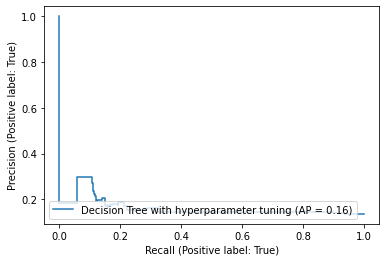

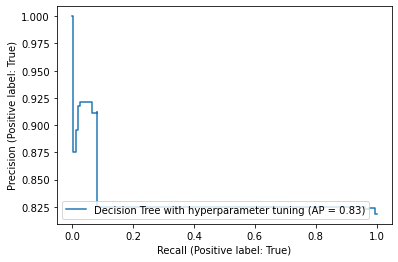

In [26]:
from sklearn.neighbors import KNeighborsClassifier

npr.seed(123)

for j in [0,1]:
    print(label[j])
    X_train = df_wt_nmf_train_01
    X_test = df_wt_nmf_test_01
    y_train, y_test = train_test_split(labeldf[label[j]], test_size=0.2, random_state=434)
    # create and fit the decision model
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_train, y_train)
    # Create the parameter grid based on the results of random search 
    params = {
    'max_depth': [20, 30, 50, 100],
    'min_samples_leaf': [2,5,10,15,20],
    'min_samples_split': [2,10,20,30,40],
    'splitter' : ['best','random'],
    'max_features' : ['sqrt','log2'],
    'criterion' : ['gini', 'entropy']
    }
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator=tree_model, 
                           param_grid=params, 
                           cv=3, n_jobs=-1, verbose=1, scoring = "f1")
    # fit grid  search on training data
    grid_search.fit(X_train, y_train)
    print(grid_search.best_estimator_)
    tree_model_best = grid_search.best_estimator_
    # make predictions on the test data after CV
    
    y_pred = tree_model_best.predict(X_test)
                    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
        
    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
    
    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")
    
    # precision/recall curve
    plot_precision_recall_curve(tree_model_best, X_test, y_test, name = 'Decision Tree with hyperparameter tuning')

    '''
    # precision/recall curves
    #calculate precision and recall
    y_score = knn_model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='blue',label='KNN')

    #add axis labels to plot
    # ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision(Positive label:True)')
    ax.set_xlabel('Recall(Positive label:True)')

    #display plot
    plt.legend()
    plt.show()
    '''

### TF-IDF without NMF/SVD (without combining content and business name) 0.003 threshold


In [32]:
# train tf-idf
tf_idf_model_train_01  = TfidfVectorizer(min_df=0.003,max_features=100)
#print(tf_idf_model.get_feature_names_out())
bustf = dic_train["business_name"]
tf_idf_vector1 = tf_idf_model_train_01.fit_transform(bustf)
tf_idf_array1 = tf_idf_vector1.toarray()
#print(tf_idf_model.get_feature_names_out())
tf_idf_model_train_01  = TfidfVectorizer(min_df=0.003,max_features=1500)
contf = dic_train["content"]
tf_idf_vector2 = tf_idf_model_train_01.fit_transform(contf)
tf_idf_array2 = tf_idf_vector2.toarray()
#words_set = tf_idf_model.get_feature_names_out()
#print(words_set)
# TF-IDF without NMF
X_01 = np.hstack((tf_idf_array1,tf_idf_array2))
df_wt_nmf_train_01 = X_01
print(df_wt_nmf_train_01)
print(len(df_wt_nmf_train_01[1]))# 3652 columns
print(len(tf_idf_array1[1]))
print(len(tf_idf_array2[1]))
# print(len(df_wt_nmf_train_01))

# test tf-idf
tf_idf_model_test_01  = TfidfVectorizer(min_df=0.003,max_features=100)
#print(tf_idf_model.get_feature_names_out())
bustf = dic_test["business_name"]
tf_idf_vector1 = tf_idf_model_test_01.fit_transform(bustf)
tf_idf_array1 = tf_idf_vector1.toarray()
#print(tf_idf_model.get_feature_names_out())
tf_idf_model_test_01  = TfidfVectorizer(min_df=0.003,max_features=1500)
contf = dic_test["content"]
tf_idf_vector2 = tf_idf_model_test_01.fit_transform(contf)
tf_idf_array2 = tf_idf_vector2.toarray()
#words_set = tf_idf_model.get_feature_names_out()
#print(words_set)
# TF-IDF without NMF
X_01 = np.hstack((tf_idf_array1,tf_idf_array2))
df_wt_nmf_test_01 = X_01
print(df_wt_nmf_test_01)
print(len(df_wt_nmf_test_01[1]))# 3652 columns
print(len(tf_idf_array1[1]))
print(len(tf_idf_array2[1]))
# print(len(df_wt_nmf_test_01))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1600
100
1500
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1600
100
1500


In [1]:
from sklearn.metrics import plot_precision_recall_curve
npr.seed(123)

for j in [0,1]:
    print(label[j])
    X_train = df_wt_nmf_train_01
    X_test = df_wt_nmf_test_01
    y_train, y_test = train_test_split(labeldf[label[j]], test_size=0.2, random_state=434)
    # create and fit the decision model
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_train, y_train)
    # Create the parameter grid based on the results of random search 
    params = {
    'max_depth': [20, 30, 50, 100],
    'min_samples_leaf': [2,5,10,15,20],
    'min_samples_split': [2,10,20,30,40],
    'splitter' : ['best','random'],
    'max_features' : ['sqrt','log2'],
    'criterion' : ['gini', 'entropy']
    }
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator=tree_model, 
                           param_grid=params, 
                           cv=3, n_jobs=-1, verbose=1, scoring = "f1")
    # fit grid  search on training data
    grid_search.fit(X_train, y_train)
    print(grid_search.best_estimator_)
    tree_model_best = grid_search.best_estimator_
    # make predictions on the test data after CV
    
    y_pred = tree_model_best.predict(X_test)
                    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
        
    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
    
    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")
    
    # precision/recall curve
    plot_precision_recall_curve(tree_model_best, X_test, y_test, name = 'Decision Tree with hyperparameter tuning')

    '''
    # precision/recall curves
    #calculate precision and recall
    y_score = knn_model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='blue',label='KNN')

    #add axis labels to plot
    # ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision(Positive label:True)')
    ax.set_xlabel('Recall(Positive label:True)')

    #display plot
    plt.legend()
    plt.show()
    '''

NameError: name 'npr' is not defined

### TF-IDF without NMF/SVD (without combining content and business name) 0.003 threshold

In [35]:
# train tf-idf
tf_idf_model_train_01  = TfidfVectorizer(min_df=0.005,max_features=58)
#print(tf_idf_model.get_feature_names_out())
bustf = dic_train["business_name"]
tf_idf_vector1 = tf_idf_model_train_01.fit_transform(bustf)
tf_idf_array1 = tf_idf_vector1.toarray()
#print(tf_idf_model.get_feature_names_out())
tf_idf_model_train_01  = TfidfVectorizer(min_df=0.005,max_features=1200)
contf = dic_train["content"]
tf_idf_vector2 = tf_idf_model_train_01.fit_transform(contf)
tf_idf_array2 = tf_idf_vector2.toarray()
#words_set = tf_idf_model.get_feature_names_out()
#print(words_set)
# TF-IDF without NMF
X_01 = np.hstack((tf_idf_array1,tf_idf_array2))
df_wt_nmf_train_01 = X_01
print(df_wt_nmf_train_01)
print(len(df_wt_nmf_train_01[1]))# 3652 columns
print(len(tf_idf_array1[1]))
print(len(tf_idf_array2[1]))
# print(len(df_wt_nmf_train_01))

# test tf-idf
tf_idf_model_test_01  = TfidfVectorizer(min_df=0.005,max_features=58)
#print(tf_idf_model.get_feature_names_out())
bustf = dic_test["business_name"]
tf_idf_vector1 = tf_idf_model_test_01.fit_transform(bustf)
tf_idf_array1 = tf_idf_vector1.toarray()
#print(tf_idf_model.get_feature_names_out())
tf_idf_model_test_01  = TfidfVectorizer(min_df=0.005,max_features=1200)
contf = dic_test["content"]
tf_idf_vector2 = tf_idf_model_test_01.fit_transform(contf)
tf_idf_array2 = tf_idf_vector2.toarray()
#words_set = tf_idf_model.get_feature_names_out()
#print(words_set)
# TF-IDF without NMF
X_01 = np.hstack((tf_idf_array1,tf_idf_array2))
df_wt_nmf_test_01 = X_01
print(df_wt_nmf_test_01)
print(len(df_wt_nmf_test_01[1]))# 3652 columns
print(len(tf_idf_array1[1]))
print(len(tf_idf_array2[1]))
# print(len(df_wt_nmf_test_01))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1258
58
1200
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1258
58
1200


is_entertainment
Fitting 3 folds for each of 800 candidates, totalling 2400 fits
DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=40,
                       random_state=42)
Accuracy: 0.84
[[3007  226]
 [ 381  131]] : is the confusion matrix
0.36694677871148457 : is the precision score
0.255859375 : is the recall score
0.3014959723820483 : is the f1 score
is_traffic


c:\Users\megal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Fitting 3 folds for each of 800 candidates, totalling 2400 fits
DecisionTreeClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=20,
                       random_state=42, splitter='random')
Accuracy: 0.81
[[  57  623]
 [  91 2974]] : is the confusion matrix
0.8268001112037809 : is the precision score
0.9703099510603589 : is the recall score
0.892824977484239 : is the f1 score


c:\Users\megal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


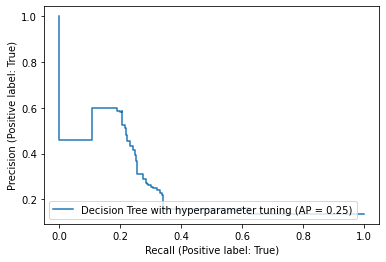

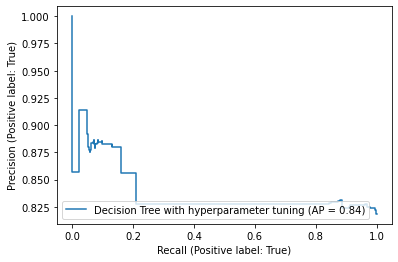

In [36]:
from sklearn.neighbors import KNeighborsClassifier

npr.seed(123)

for j in [0,1]:
    print(label[j])
    X_train = df_wt_nmf_train_01
    X_test = df_wt_nmf_test_01
    y_train, y_test = train_test_split(labeldf[label[j]], test_size=0.2, random_state=434)
    # create and fit the decision model
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_train, y_train)
    # Create the parameter grid based on the results of random search 
    params = {
    'max_depth': [20, 30, 50, 100],
    'min_samples_leaf': [2,5,10,15,20],
    'min_samples_split': [2,10,20,30,40],
    'splitter' : ['best','random'],
    'max_features' : ['sqrt','log2'],
    'criterion' : ['gini', 'entropy']
    }
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator=tree_model, 
                           param_grid=params, 
                           cv=3, n_jobs=-1, verbose=1, scoring = "f1")
    # fit grid  search on training data
    grid_search.fit(X_train, y_train)
    print(grid_search.best_estimator_)
    tree_model_best = grid_search.best_estimator_
    # make predictions on the test data after CV
    
    y_pred = tree_model_best.predict(X_test)
                    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
        
    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
    
    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")
    
    # precision/recall curve
    plot_precision_recall_curve(tree_model_best, X_test, y_test, name = 'Decision Tree with hyperparameter tuning')

    '''
    # precision/recall curves
    #calculate precision and recall
    y_score = knn_model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='blue',label='KNN')

    #add axis labels to plot
    # ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision(Positive label:True)')
    ax.set_xlabel('Recall(Positive label:True)')

    #display plot
    plt.legend()
    plt.show()
    '''

### TF-IDF without NMF/SVD (without combining content and business name) 0.01 threshold

In [40]:
# train tf-idf
tf_idf_model_train_01  = TfidfVectorizer(min_df=0.01,max_features=25)
#print(tf_idf_model.get_feature_names_out())
bustf = dic_train["business_name"]
tf_idf_vector1 = tf_idf_model_train_01.fit_transform(bustf)
tf_idf_array1 = tf_idf_vector1.toarray()
#print(tf_idf_model.get_feature_names_out())
tf_idf_model_train_01  = TfidfVectorizer(min_df=0.01,max_features=732)
contf = dic_train["content"]
tf_idf_vector2 = tf_idf_model_train_01.fit_transform(contf)
tf_idf_array2 = tf_idf_vector2.toarray()
#words_set = tf_idf_model.get_feature_names_out()
#print(words_set)
# TF-IDF without NMF
X_01 = np.hstack((tf_idf_array1,tf_idf_array2))
df_wt_nmf_train_01 = X_01
print(df_wt_nmf_train_01)
print(len(df_wt_nmf_train_01[1]))# 3652 columns
print(len(tf_idf_array1[1]))
print(len(tf_idf_array2[1]))
# print(len(df_wt_nmf_train_01))

# test tf-idf
tf_idf_model_test_01  = TfidfVectorizer(min_df=0.01,max_features=25)
#print(tf_idf_model.get_feature_names_out())
bustf = dic_test["business_name"]
tf_idf_vector1 = tf_idf_model_test_01.fit_transform(bustf)
tf_idf_array1 = tf_idf_vector1.toarray()
#print(tf_idf_model.get_feature_names_out())
tf_idf_model_test_01  = TfidfVectorizer(min_df=0.01,max_features=732)
contf = dic_test["content"]
tf_idf_vector2 = tf_idf_model_test_01.fit_transform(contf)
tf_idf_array2 = tf_idf_vector2.toarray()
#words_set = tf_idf_model.get_feature_names_out()
#print(words_set)
# TF-IDF without NMF
X_01 = np.hstack((tf_idf_array1,tf_idf_array2))
df_wt_nmf_test_01 = X_01
print(df_wt_nmf_test_01)
print(len(df_wt_nmf_test_01[1]))# 3652 columns
print(len(tf_idf_array1[1]))
print(len(tf_idf_array2[1]))
# print(len(df_wt_nmf_test_01))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
757
25
732
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
757
25
732


is_entertainment
Fitting 3 folds for each of 800 candidates, totalling 2400 fits
DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=40,
                       random_state=42, splitter='random')
Accuracy: 0.86
[[3109  124]
 [ 413   99]] : is the confusion matrix
0.4439461883408072 : is the precision score
0.193359375 : is the recall score
0.2693877551020409 : is the f1 score
is_traffic


c:\Users\megal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Fitting 3 folds for each of 800 candidates, totalling 2400 fits
DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_leaf=15, random_state=42, splitter='random')
Accuracy: 0.81
[[ 132  548]
 [ 166 2899]] : is the confusion matrix
0.8410211778357992 : is the precision score
0.9458401305057096 : is the recall score
0.8903562653562653 : is the f1 score


c:\Users\megal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


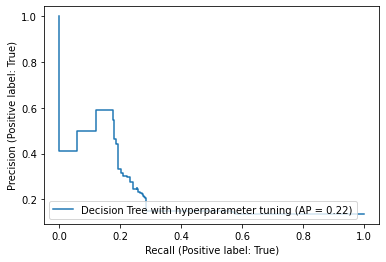

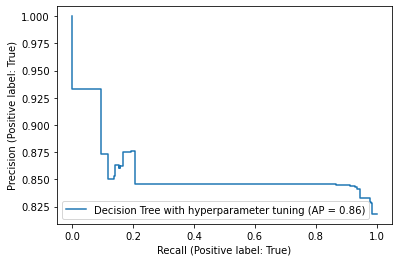

In [41]:
from sklearn.neighbors import KNeighborsClassifier

npr.seed(123)

for j in [0,1]:
    print(label[j])
    X_train = df_wt_nmf_train_01
    X_test = df_wt_nmf_test_01
    y_train, y_test = train_test_split(labeldf[label[j]], test_size=0.2, random_state=434)
    # create and fit the decision model
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_train, y_train)
    # Create the parameter grid based on the results of random search 
    params = {
    'max_depth': [20, 30, 50, 100],
    'min_samples_leaf': [2,5,10,15,20],
    'min_samples_split': [2,10,20,30,40],
    'splitter' : ['best','random'],
    'max_features' : ['sqrt','log2'],
    'criterion' : ['gini', 'entropy']
    }
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator=tree_model, 
                           param_grid=params, 
                           cv=3, n_jobs=-1, verbose=1, scoring = "f1")
    # fit grid  search on training data
    grid_search.fit(X_train, y_train)
    print(grid_search.best_estimator_)
    tree_model_best = grid_search.best_estimator_
    # make predictions on the test data after CV
    
    y_pred = tree_model_best.predict(X_test)
                    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
        
    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
    
    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")
    
    # precision/recall curve
    plot_precision_recall_curve(tree_model_best, X_test, y_test, name = 'Decision Tree with hyperparameter tuning')

    '''
    # precision/recall curves
    #calculate precision and recall
    y_score = knn_model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='blue',label='KNN')

    #add axis labels to plot
    # ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision(Positive label:True)')
    ax.set_xlabel('Recall(Positive label:True)')

    #display plot
    plt.legend()
    plt.show()
    '''